### Aidi Li / Xiaotong Cui/ Muhua Huang
### Exploratory data analysis

There are 5 parts in this notebook. 


- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    > missing value and outlier detection <br>
    
- **Part-3: Data transformation**
    > normalize numerical data <br>
    > transform text data: tokenization, stemming, and lemmatization <br>
    
- **Part-4: Feature engineering**
    > encode categorical data <br>
    > convert DataTime data <br>
    > text feature representation <br>

- **Part-5: Additional analysis**
    > create new features <br>
    > colinearty check <br>

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# OkCupid is a mobile dating app.
# It sets itself apart from other dating apps by making use of a pre computed compatibility score,
# calculated by optional questions the users may choose to answer.

#In this dataset, there are 60k records containing structured information such as age, sex, orientation 
# as well as text data from open ended descriptions.
#I'm also interested in the text of the profile, which is the "essay" parts 


f_loc = "/Users/adhdtreamentii/Desktop/UChicago 2024/UChicago Winter 24/MACSS-30100/Final/data/raw_okcupid_profiles.csv"

okc_df = pd.read_csv(f_loc)



# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
okc_df.shape

# 59946 samples, 31 attributes/features

(59946, 31)

In [329]:
# get an overview of the top-n rows/samples
okc_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


### Process the text/string

In [330]:
# Accoridng to the output, we have 31 columns in the data
# I interested the 10 self description responses, which are the following columns: essay0 - essay9
# So I need to give more meaningful names to these columns, based on the topic of the data

column_mapping = {
    'essay0': 'My self summary',
    'essay1': 'What I’m doing with my life',
    'essay2': 'I’m really good at',
    'essay3': 'The first thing people usually notice about me',
    'essay4': 'Favorite books, movies, show, music, and food',
    'essay5': 'The six things I could never do without',
    'essay6': 'I spend a lot of time thinking about',
    'essay7': 'On a typical Friday night I am',
    'essay8': 'The most private thing I am willing to admit',
    'essay9': 'You should message me if…'
}

okc_df.rename(columns=column_mapping, inplace=True)


print(okc_df.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'My self summary', 'What I’m doing with my life',
       'I’m really good at', 'The first thing people usually notice about me',
       'Favorite books, movies, show, music, and food',
       'The six things I could never do without',
       'I spend a lot of time thinking about',
       'On a typical Friday night I am',
       'The most private thing I am willing to admit',
       'You should message me if…'],
      dtype='object')


In [331]:
##　We want to merge all the self description responses into one column, so we can do the analysis on the whole text

columns_to_merge = ['My self summary', 'What I’m doing with my life',
       'I’m really good at', 'The first thing people usually notice about me',
       'Favorite books, movies, show, music, and food',
       'The six things I could never do without',
       'I spend a lot of time thinking about',
       'On a typical Friday night I am',
       'The most private thing I am willing to admit',
       'You should message me if…']


# fill null values with empty string
okc_df[columns_to_merge] = okc_df[columns_to_merge].fillna('')
okc_df['merged_profile'] = okc_df[columns_to_merge].apply(lambda x: ' '.join(x), axis=1)


print(okc_df['merged_profile'].head())
print('\n')
# Check if there is any null value in the merged column
# If there is any null value, fill it with empty string
print(okc_df['merged_profile'].isna().sum())

0    about me:  i would love to think that i was so...
1    i am a chef: this is what that means. 1. i am ...
2    i'm not ashamed of much, but writing public te...
3    i work in a library and go to school. . . read...
4    hey how's it going? currently vague on the pro...
Name: merged_profile, dtype: object


0


In [332]:
# But we still need to check if there is any empty string in the merged column and convert it to null value
# This is for the next filtering step
only_empty_strings_count = okc_df['merged_profile'].apply(lambda x: x.strip() == '').sum()

print(f"Number of rows where 'merged_profile' only contains empty strings: {only_empty_strings_count}")

okc_df.loc[okc_df['merged_profile'].apply(lambda x: x.strip() == ''), 'merged_profile'] = np.nan

new_nan_count = okc_df['merged_profile'].isna().sum()

print(f"New number of NaNs in 'merged_profile': {new_nan_count}")

Number of rows where 'merged_profile' only contains empty strings: 2124
New number of NaNs in 'merged_profile': 2124


In [333]:
# check the data types: columns with mixed types are stored with the object dtype.
okc_df.dtypes 

age                                                 int64
status                                             object
sex                                                object
orientation                                        object
body_type                                          object
diet                                               object
drinks                                             object
drugs                                              object
education                                          object
ethnicity                                          object
height                                            float64
income                                              int64
job                                                object
last_online                                        object
location                                           object
offspring                                          object
pets                                               object
religion      

### income, age, height (quantitative variables)
### data cleaning and transformation
### check if there's outliers

In [334]:
okc_df.income.value_counts()

# -1 means the user prefers not to say
# It turns out, majority of users don't provide their earnings. 
# Which I find appropriate since this shouldn't be a criteria to choose a partner.

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [335]:
print('Minimum age in data set {}'.format(okc_df.age.min()))
print('Maximum age in data set {}'.format(okc_df.age.max()))
print("\n")
print('Minimum height in data set {}'.format(okc_df.height.min()))
print('Maximum height in data set {}'.format(okc_df.height.max()))

Minimum age in data set 18
Maximum age in data set 110


Minimum height in data set 1.0
Maximum height in data set 95.0


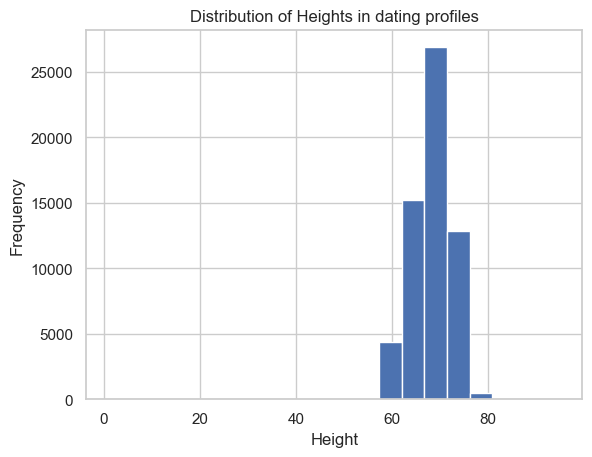

In [336]:
# Visualize the distribution
plt.hist(okc_df['height'].dropna(), bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Heights in dating profiles')
plt.show()

In [337]:
print(len(okc_df[okc_df['height']<50]))

27


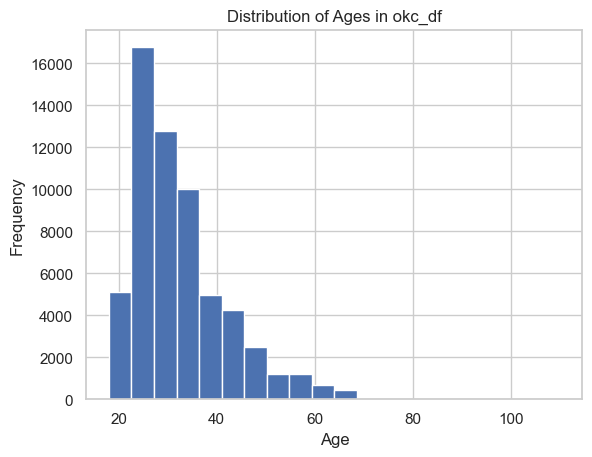

In [338]:
plt.hist(okc_df['age'].dropna(), bins=20) 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in okc_df')
plt.show()

# the minimum age is 18, which is the minimum age to use the app

# 

In [339]:
Q1 = okc_df['age'].quantile(0.25)
Q3 = okc_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

26.0 37.0 9.5 53.5


In [340]:
Q1 = okc_df['height'].quantile(0.25)
Q3 = okc_df['height'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

66.0 71.0 58.5 78.5


In [341]:
# There are 27 users having height less than 50 inches 
# I will remove these users from the data set
# and 
# height below 50
# height above 78
# age older than 85 years old

In [342]:
# clean up the outliers 
print(f'before: {okc_df.shape}')

okc_df = okc_df[(okc_df['age']<85) & (okc_df['height']<78) & (okc_df['height']>50)]

print(f'after: {okc_df.shape}')

before: (59946, 32)
after: (59619, 32)


Distribution of Age and Height after removing extreme values

/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_16970/807900815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[0] = sns.violinplot(ax = ax[0], y = 'age', x='sex', data=okc_df, palette='Set1')
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_16970/807900815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.violinplot(ax = ax[1], x = 'height', y= 'sex',data=okc_df, palette='Set1')


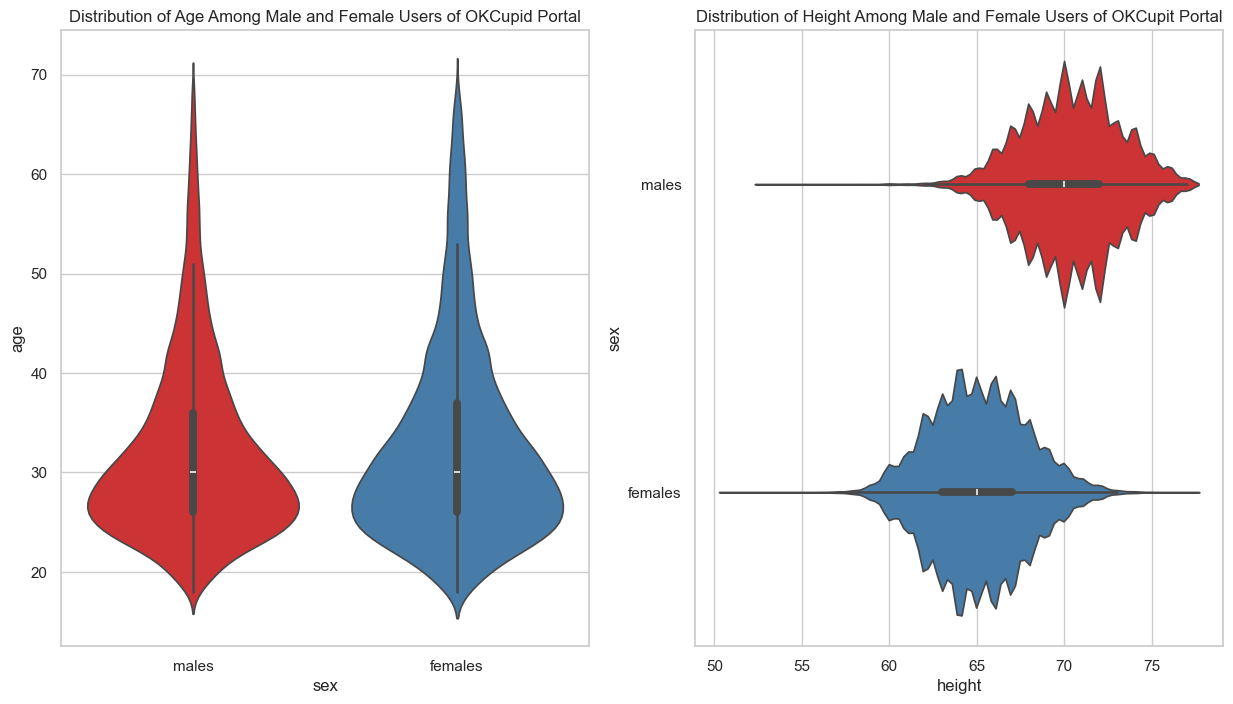

In [343]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize=(15,8))
labels = ['males', 'females']
ax[0] = sns.violinplot(ax = ax[0], y = 'age', x='sex', data=okc_df, palette='Set1')
ax[1] = sns.violinplot(ax = ax[1], x = 'height', y= 'sex',data=okc_df, palette='Set1')
ax[0].set_title("Distribution of Age Among Male and Female Users of OKCupid Portal")
ax[1].set_title("Distribution of Height Among Male and Female Users of OKCupit Portal")
ax[0].set_xticks(range(2))
ax[0].set_xticklabels(labels)
ax[1].set_yticks(range(2))
ax[1].set_yticklabels(labels)
plt.show()

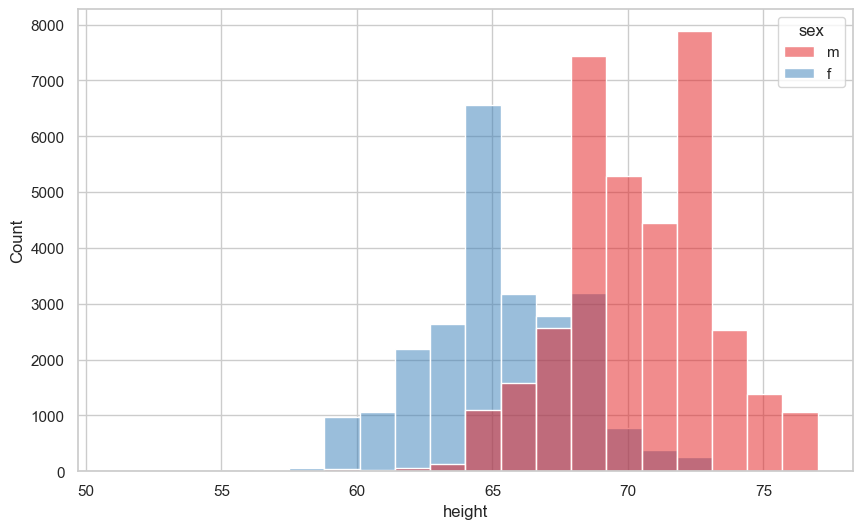

In [344]:
plt.figure(figsize=(10,6))
sns.histplot(data = okc_df, x='height', bins = 20, hue='sex', palette='Set1')
plt.show()

In [345]:
averages = okc_df.groupby('sex').age.mean()
print("average age of portal users is: ")
print(averages)
print('median:' + str(okc_df.age.median()))

average age of portal users is: 
sex
f    32.819125
m    32.020577
Name: age, dtype: float64
median:30.0


In [346]:
# The average age of users is roughly equal across genders, at about 32 years.
# However, a closer examination reveals that the average age for females is slightly higher.
# The age distribution is right-skewed, indicating a larger number of users younger than the average age.
# The median age is approximately 30, as indicated by the white dot in the violin plot.
# For height, the median value is around 65 inches for women and about 70 inches for men.

### education(cat) cleaning and visualization

In [347]:
#we will take two last words since they usually describe education, but we might need to clean this even more 
okc_df['education_clean'] =okc_df.education.str.split().str[-2:].str.join(' ')
okc_df.education_clean.value_counts()

from college/university    23848
masters program            10887
on college/university       5679
two-year college            3001
ph.d program                2393
high school                 1693
space camp                  1661
law school                  1421
of college/university        986
college/university           795
med school                   679
Name: education_clean, dtype: int64

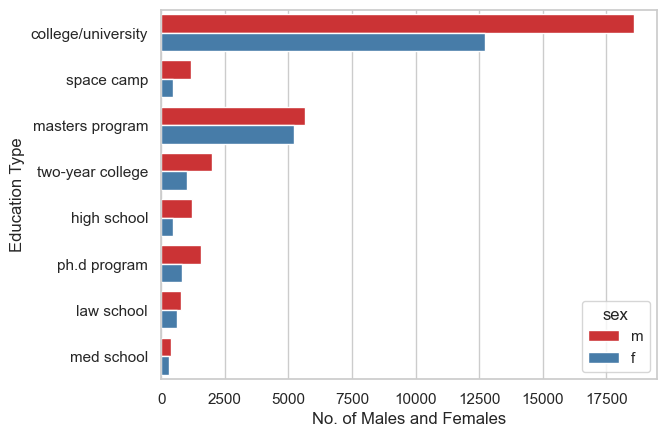

In [348]:
e = {'from college/university': 'college/university', 'masters program': 'masters program', 'on college/university': 'college/university', 'two-year college': 'two-year college', 'ph.d program': 'ph.d program', 'high school':'high school', 'space camp': 'space camp', 'law school': 'law school', 'of college/university': 'college/university', 'college/university':'college/university', 'med school': 'med school'}

okc_df['education_final'] = okc_df['education_clean'].map(e)
sns.countplot(data = okc_df, y = 'education_final', hue='sex', palette='Set1')
plt.xlabel('No. of Males and Females')
plt.ylabel('Education Type')
plt.show()

religions (cat) 

In [349]:
# We want to sort the religion column into 3 categories: atheist and theists，other

okc_df['religion'].value_counts()

agnosticism                                   2714
other                                         2680
agnosticism but not too serious about it      2626
agnosticism and laughing about it             2477
catholicism but not too serious about it      2310
atheism                                       2162
other and laughing about it                   2100
atheism and laughing about it                 2059
christianity                                  1945
christianity but not too serious about it     1942
other but not too serious about it            1545
judaism but not too serious about it          1515
atheism but not too serious about it          1313
catholicism                                   1058
christianity and somewhat serious about it     923
other and somewhat serious about it            840
atheism and somewhat serious about it          839
catholicism and laughing about it              724
judaism and laughing about it                  679
buddhism but not too serious ab

In [350]:
# get the unique values of religion
religion_values = set(okc_df['religion'])

# print the unique values of religion
print(religion_values)
print(f"There are {len(religion_values)} religions。")


# 5(1 non degree specified, 4 degrees specified) * 9  religion values = 36, nan = 37, + 9 religion values = 46


{nan, 'atheism but not too serious about it', 'catholicism but not too serious about it', 'catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'other but not too serious about it', 'islam and laughing about it', 'buddhism and somewhat serious about it', 'christianity and somewhat serious about it', 'christianity but not too serious about it', 'catholicism', 'christianity and laughing about it', 'judaism but not too serious about it', 'judaism and laughing about it', 'other', 'catholicism and laughing about it', 'atheism and very serious about it', 'hinduism and somewhat serious about it', 'atheism and laughing about it', 'hinduism and laughing about it', 'hinduism but not too serious about it', 'agnosticism and very serious about it', 'hinduism and very serious about it', 'judaism', 'islam and somewhat serious about it', 'atheism and somewhat serious about it', 'agnosticism and laughing about it', 'buddhism and laughing about it', 'islam and very se

In [351]:
# Major religions
religions = ['agnosticism', 'other', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

# degrees of seriousness
degrees = ['very serious about it', 'somewhat serious about it', 'not too serious about it', 'laughing about it', 'no degree specified']


religion_counts = {religion: {degree: 0 for degree in degrees} for religion in religions}

for religion in religions:
    for degree in degrees:
        if degree == 'no degree specified':
            # calculate the number of users with no degree of seriousness specified
            pattern = f'^{religion}$'
        else:
            # calculate the number of users with the specified degree of seriousness
            pattern = f'{religion}( and| but)? {degree}'

        count = okc_df['religion'].str.contains(pattern, na=False, regex=True).sum()
        religion_counts[religion][degree] = count

    # calculate the total count for each religion
    religion_counts[religion]['total'] = sum(religion_counts[religion].values())


nan_count = okc_df['religion'].isna().sum()
total_count = sum([counts['total'] for counts in religion_counts.values()]) + nan_count


for religion, counts in religion_counts.items():
    print(f"{religion}:")
    for degree, count in counts.items():
        print(f"  {degree}: {count}")
print(f"nan: {nan_count}")
print(f"sum: {total_count}")


/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_16970/4196711166.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = okc_df['religion'].str.contains(pattern, na=False, regex=True).sum()


agnosticism:
  very serious about it: 314
  somewhat serious about it: 635
  not too serious about it: 2626
  laughing about it: 2477
  no degree specified: 2714
  total: 8766
other:
  very serious about it: 524
  somewhat serious about it: 840
  not too serious about it: 1545
  laughing about it: 2100
  no degree specified: 2680
  total: 7689
catholicism:
  very serious about it: 102
  somewhat serious about it: 544
  not too serious about it: 2310
  laughing about it: 724
  no degree specified: 1058
  total: 4738
atheism:
  very serious about it: 565
  somewhat serious about it: 839
  not too serious about it: 1313
  laughing about it: 2059
  no degree specified: 2162
  total: 6938
christianity:
  very serious about it: 569
  somewhat serious about it: 923
  not too serious about it: 1942
  laughing about it: 372
  no degree specified: 1945
  total: 5751
judaism:
  very serious about it: 22
  somewhat serious about it: 264
  not too serious about it: 1515
  laughing about it: 679
  n

In [352]:
# define the major religions
religions = ['agnosticism', 'other', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

# function to extract the religion category
def extract_religion_category(religion_str):
    if pd.isna(religion_str):
        return None  # For NaN 
    for religion in religions:
        if religion in religion_str:
            return religion
    return religion_str  

# a new column to store the cleaned religion
okc_df['cleaned_religion'] = okc_df['religion'].apply(extract_religion_category)

religion_counts = okc_df['cleaned_religion'].value_counts()


print(religion_counts)


total_count = religion_counts.sum()
print(f"Total is: {total_count}")


agnosticism     8766
other           7689
atheism         6938
christianity    5751
catholicism     4738
judaism         3092
buddhism        1937
hinduism         448
islam            135
Name: cleaned_religion, dtype: int64
Total is: 39494


In [353]:
# define the seriousness degrees
def map_seriousness(religion_str):
    if pd.isna(religion_str):
        return None  
    seriousness_mapping = {
        'very serious about it': 4,
        'somewhat serious about it': 3,
        'not too serious about it': 2,
        'laughing about it': 1,
        'no degree specified': 0
    }
    for degree, value in seriousness_mapping.items():
        if degree in religion_str:
            return value
    return 0  # 0 for no degree specified

# a new column to store the seriousness degree
okc_df['seriousness_degree'] = okc_df['religion'].apply(map_seriousness)


seriousness_counts = okc_df['seriousness_degree'].value_counts()
print(seriousness_counts)


total_seriousness_count = seriousness_counts.sum()
print(f"Total seriousness count is: {total_seriousness_count}")


2.0    12163
0.0    11725
1.0     8935
3.0     4480
4.0     2191
Name: seriousness_degree, dtype: int64
Total seriousness count is: 39494


In [354]:
# let's take a look
# great, it transformed into a numeric column
print(okc_df[['religion', 'cleaned_religion', 'seriousness_degree']].head())

                                   religion cleaned_religion  \
0     agnosticism and very serious about it      agnosticism   
1  agnosticism but not too serious about it      agnosticism   
2                                       NaN             None   
3                                       NaN             None   
4                                       NaN             None   

   seriousness_degree  
0                 4.0  
1                 2.0  
2                 NaN  
3                 NaN  
4                 NaN  


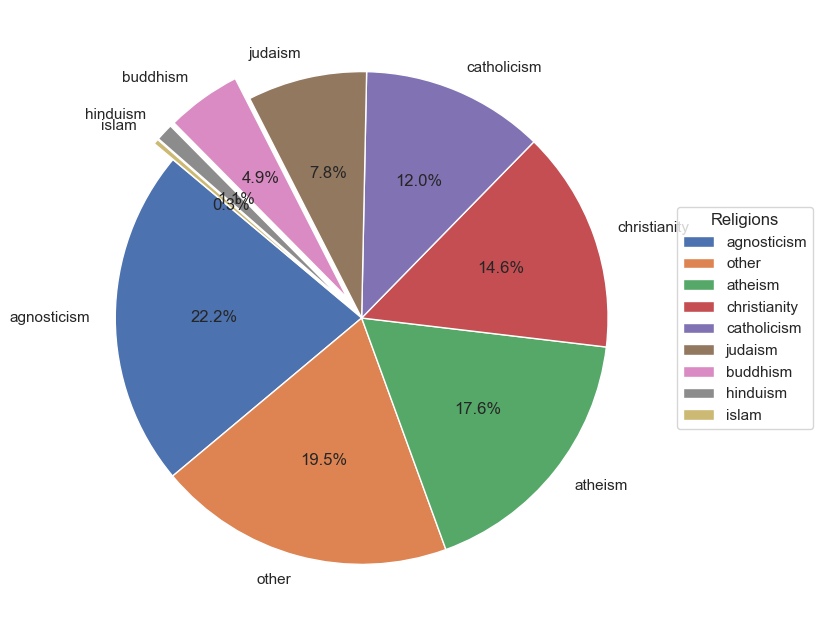

In [355]:
# calculate the percentage of users with their religion specified
religion_counts = okc_df['cleaned_religion'].value_counts()


labels = religion_counts.index
sizes = religion_counts.values

# in order to highlight the small proportions, we can set a small "explode" value for each section
explode = [0.1 if size / sum(sizes) < 0.05 else 0 for size in sizes]

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)


plt.legend(title="Religions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [356]:
# define belief categories
def classify_belief(religion):
    if pd.isna(religion) or religion == 'nan':
        return None
    elif religion == 'atheism':
        return 'atheism'
    elif religion in 'other':
        return 'other'
    elif religion in 'agnosticism':
        return 'agnosticism'
    else:
        return 'theism' # all other religions are theism,e.g. christianity, judaism, buddhism, hinduism, islam

In [357]:
okc_df['belief'] = okc_df['cleaned_religion'].apply(classify_belief)

print(okc_df[['cleaned_religion', 'belief']].tail(10))

      cleaned_religion       belief
59936          atheism      atheism
59937          judaism       theism
59938            other        other
59939             None         None
59940      agnosticism  agnosticism
59941      catholicism       theism
59942      agnosticism  agnosticism
59943     christianity       theism
59944      agnosticism  agnosticism
59945      catholicism       theism


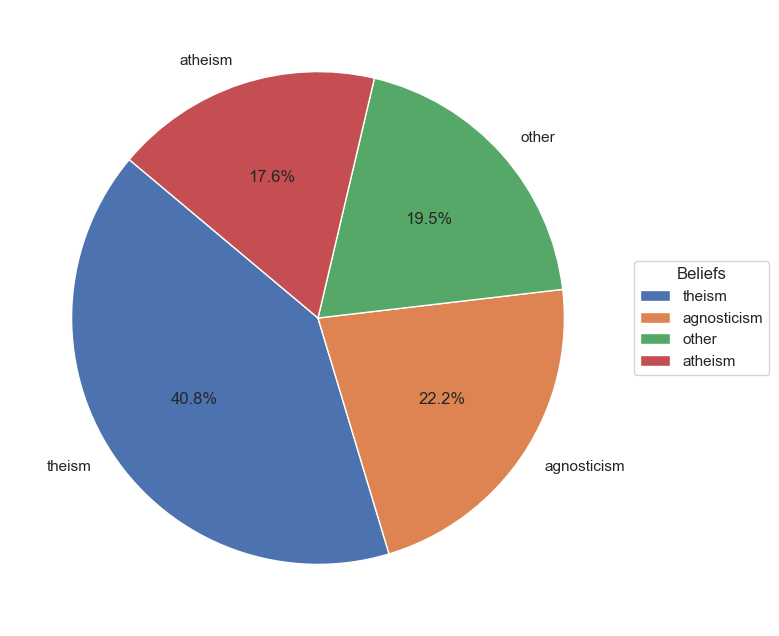

In [358]:
# visualize the belief counts
belief_counts = okc_df['belief'].value_counts()

labels = belief_counts.index
sizes = belief_counts.values

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.legend(title="Beliefs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [359]:
# we can see that the majority of users are theists, followed by atheists and agnostics
# but it's still unclear that 'other' means what
# I will consider to drop this value

### Explore the correlation between orientation and belief

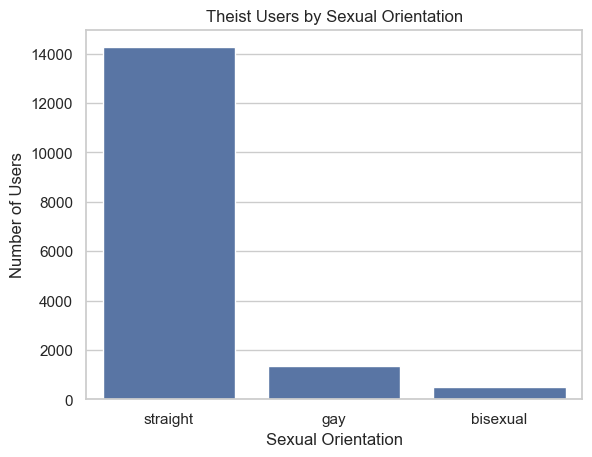

In [360]:
theist_df = okc_df[okc_df['belief'] == 'theism']

orientation_counts = theist_df['orientation'].value_counts()

sns.barplot(x=orientation_counts.index, y=orientation_counts.values)
plt.title('Theist Users by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Users')
plt.show()

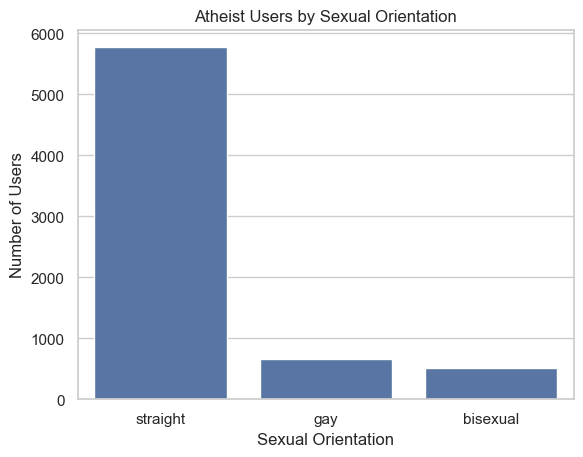

In [361]:
atheism_df = okc_df[okc_df['belief'] == 'atheism']

orientation_counts = atheism_df['orientation'].value_counts()

sns.barplot(x=orientation_counts.index, y=orientation_counts.values)
plt.title('Atheist Users by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Users')
plt.show()

In [362]:
# Cannot tell much from the above two plots

### Let's take a look at the seriousness' role in refelcting one's SO

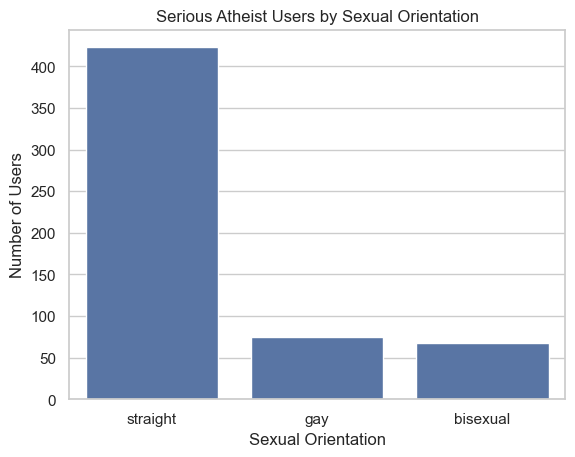

In [363]:
serious_atheism_df = okc_df[(okc_df['belief'] == 'atheism') & (okc_df['seriousness_degree'] == 4)]

orientation_counts = serious_atheism_df['orientation'].value_counts()

sns.barplot(x=orientation_counts.index, y=orientation_counts.values)
plt.title('Serious Atheist Users by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Users')
plt.show()

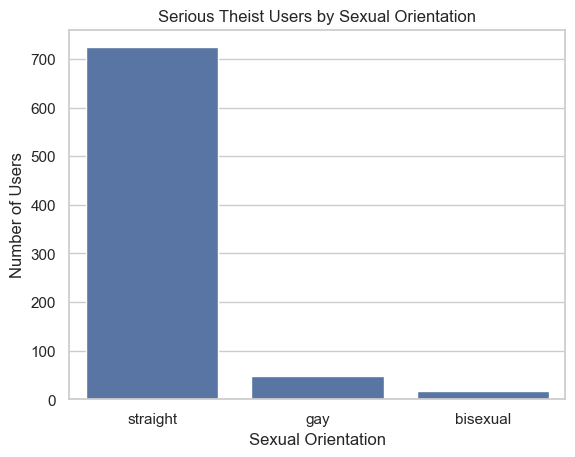

In [364]:
serious_atheism_df = okc_df[(okc_df['belief'] == 'theism') & (okc_df['seriousness_degree'] == 4)]

orientation_counts = serious_atheism_df['orientation'].value_counts()

sns.barplot(x=orientation_counts.index, y=orientation_counts.values)
plt.title('Serious Theist Users by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Users')
plt.show()

In [365]:
# it seems like the degree of seriousness of one's religion somewhat refelct the sexual orientation of the users

### Data cleaning

#### check data type

In [366]:
# check the data types: columns with mixed types are stored with the object dtype.
okc_df.dtypes 

age                                                 int64
status                                             object
sex                                                object
orientation                                        object
body_type                                          object
diet                                               object
drinks                                             object
drugs                                              object
education                                          object
ethnicity                                          object
height                                            float64
income                                              int64
job                                                object
last_online                                        object
location                                           object
offspring                                          object
pets                                               object
religion      

#### organize columns into different data types
The .dtype attribute shows that the current data type for each column is "object", this is either because the column contains missing values or because it contains values of different types.   

We will organize the columns into the following common data types based on the observation (decide the data type based on its values):
- Categorical: 
    > status, sex, orientation, body_type, diet, drinks, drugs, education, ethnicity, job, location, offspring, pets, religion, sign, smokes, speaks, education_clean(new), education_final(new), cleaned_religion(new), belief(new)<br>
- Numerical: 
    > age, height, income, seriousness_degree(new) <br>
- DateTime: 
    > last_online <br>
- String/Text: 
    > My self summary, What I’m doing with my life, I’m really good at, The first thing people usually notice about me, Favorite books, movies, show, music, and food, The six things I could never do without, I spend a lot of time thinking about, On a typical Friday night I am, The most private thing I am willing to admit, You should message me if…, merged_profile(new) <br>

In the following part, I will: 
- convert the original data into the organized data type 
- check missing values
- do data processing for the converted data

#### process categorical data

In [367]:
categorical_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks', 'education_clean', 'education_final', 'cleaned_religion', 'belief']

okc_df[categorical_cols] = okc_df[categorical_cols].astype('category')

okc_df[categorical_cols]

,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,job,...,offspring,pets,religion,sign,smokes,speaks,education_clean,education_final,cleaned_religion,belief
0,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",transportation,...,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,on college/university,college/university,agnosticism,agnosticism
1,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,hospitality / travel,...,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",space camp,space camp,agnosticism,agnosticism
2,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,NaN,...,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",masters program,masters program,NaN,NaN
3,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,student,...,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",on college/university,college/university,NaN,NaN
4,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",artistic / musical / writer,...,NaN,likes dogs and likes cats,NaN,aquarius,no,english,from college/university,college/university,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,sales / marketing / biz dev,...,has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,from college/university,college/university,catholicism,theism
59942,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",entertainment / media,...,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),on college/university,college/university,agnosticism,agnosticism
59943,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,construction / craftsmanship,...,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),masters program,masters program,christianity,theism
59944,single,m,straight,athletic,mostly anything,socially,often,working on college/university,"asian, black",medicine / health,...,"doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",on college/university,college/university,agnosticism,agnosticism


In [368]:
# the following columns now all have the categorical data types
okc_df[categorical_cols].dtypes

status              category
sex                 category
orientation         category
body_type           category
diet                category
drinks              category
drugs               category
education           category
ethnicity           category
job                 category
location            category
offspring           category
pets                category
religion            category
sign                category
smokes              category
speaks              category
education_clean     category
education_final     category
cleaned_religion    category
belief              category
dtype: object

In [369]:
# age, height, income as numeric data types
# age and height are integers, income is float
# it's already in the correct data type

In [370]:
# to date time
# okc_df['last_online'] = pd.to_datetime(okc_df['last_online'])
# nevermind, this column is useless

In [371]:
# the others are all text data, which are stored with the object dtype

#### check missing values

In [372]:
null_sum = okc_df.isnull().sum().reset_index()
descriptions = [
    'age of user',  # age
    'relationship status',  # status
    'gender',  # sex
    'sexual orientation',  # orientation
    'body type of user',  # body_type
    'dietary information',  # diet
    'alcohol consumption',  # drinks
    'drug usage',  # drugs
    'educational attainment',  # education
    'ethnic backgrounds',  # ethnicity
    'height of user',  # height
    'income of user',  # income
    'employment description',  # job
    'last login',  # last_online
    'user locations',  # location
    'children status',  # offspring
    'pet preferences',  # pets
    'religious background',  # religion
    'astrological symbol',  # sign
    'smoking consumption',  # smokes
    'language spoken',  # speaks
    'My self summary',  # My self summary
    'What I’m doing with my life',  # What I’m doing with my life
    'I’m really good at',  # I’m really good at
    'The first thing people usually notice about me',  # The first thing people usually notice about me
    'Favorite books, movies, show, music, and food',  # Favorite books, movies, show, music, and food
    'The six things I could never do without',  # The six things I could never do without
    'I spend a lot of time thinking about',  # I spend a lot of time thinking about
    'On a typical Friday night I am',  # On a typical Friday night I am
    'The most private thing I am willing to admit',  # The most private thing I am willing to admit
    'You should message me if…',  # You should message me if…
    'Combined text from all essay sections',  # merged_profile
    'Cleaned and simplified education information',  # education_clean
    'Finalized education information after processing',  # education_final
    'Cleaned version of religious background',  # cleaned_religion
    'Degree of seriousness about religion',  # seriousness_degree
    'General belief category based on religion'  # belief
]


data = {'Features': okc_df.columns, 'Zero_Values': null_sum [0], 'Colum_Description': descriptions}

empty_check_df = pd.DataFrame(data)
empty_check_df


,Features,Zero_Values,Colum_Description
0,age,0,age of user
1,status,0,relationship status
2,sex,0,gender
3,orientation,0,sexual orientation
4,body_type,5265,body type of user
5,diet,24258,dietary information
6,drinks,2947,alcohol consumption
7,drugs,14004,drug usage
8,education,6576,educational attainment
9,ethnicity,5635,ethnic backgrounds


In [373]:
# we will come back to cleaning null data later

In [374]:
# check the data type
okc_df.dtypes

age                                                  int64
status                                            category
sex                                               category
orientation                                       category
body_type                                         category
diet                                              category
drinks                                            category
drugs                                             category
education                                         category
ethnicity                                         category
height                                             float64
income                                               int64
job                                               category
last_online                                         object
location                                          category
offspring                                         category
pets                                              catego

In [375]:
# it's seem like the cat variable is highly structured and the outliers are not very obvious
# some var not very useful, I will consider to drop them
# but it does no harm to leave them there for now
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(okc_df[col].value_counts())
    print("\n") 

Value counts for status:
single            55398
seeing someone     2049
available          1854
married             308
unknown              10
Name: status, dtype: int64


Value counts for sex:
m    35525
f    24094
Name: sex, dtype: int64


Value counts for orientation:
straight    51312
gay          5554
bisexual     2753
Name: orientation, dtype: int64


Value counts for body_type:
average           14589
fit               12661
athletic          11727
thin               4691
curvy              3920
a little extra     2612
skinny             1767
full figured       1006
overweight          437
jacked              408
used up             340
rather not say      196
Name: body_type, dtype: int64


Value counts for diet:
mostly anything        16502
anything                6159
strictly anything       5073
mostly vegetarian       3431
mostly other             998
strictly vegetarian      869
vegetarian               664
strictly other           447
mostly vegan             337
other 

In [376]:
# howver, I like to discover the co-existence of belief and their merged profile
# so the dropping criteria is to drop the rows where either belief or merged_profile is missing

# Calculate the number of rows where at least one of 'belief' or 'merged_profile' is missing
at_least_one_empty_count = okc_df[(okc_df['belief'].isna()) | (okc_df['merged_profile'].isna())].shape[0]

print(f"Number of rows where at least one of 'belief' or 'merged_profile' is missing: {at_least_one_empty_count}")


Number of rows where at least one of 'belief' or 'merged_profile' is missing: 21235


In [377]:
original_count = len(okc_df)

# delete 'belief' or 'merged_profile' at least one null label
okc_df = okc_df.dropna(subset=['belief', 'merged_profile'])


new_count = len(okc_df)


print(f"Original count: {original_count}")
print(f"New count: {new_count}")

Original count: 59619
New count: 38384


### Feature Engineering

#### Text transformation 
- tokenization, stemming, lemmatization

In [378]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adhdtreamentii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adhdtreamentii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adhdtreamentii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [379]:
def tokenize_and_normalize(text):
    # tokenize
    tokens = word_tokenize(text)

    # punctuation removal
    tokens = [word for word in tokens if word.isalpha()]

    # lowercase
    tokens = [word.lower() for word in tokens]

    # stop words removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [380]:
okc_df['tokenized_normalized_profile'] = okc_df['merged_profile'].apply(tokenize_and_normalize)

In [381]:
okc_df['tokenized_normalized_profile']

0        [would, love, think, kind, intellectual, eithe...
1        [chef, mean, workaholic, love, cook, regardles...
5        [australian, living, san, francisco, hold, spe...
7        [writing, meeting, new, people, spending, time...
8        [oh, goodness, moment, job, nice, find, one, c...
                               ...                        
59941    [vibrant, expressive, caring, optimist, love, ...
59942    [nick, never, know, write, sure, hand, souther...
59943    [hello, enjoy, traveling, watching, movie, han...
59944    [world, ball, integrity, one, take, either, aw...
59945    [odd, little, enemy, status, someone, make, se...
Name: tokenized_normalized_profile, Length: 38384, dtype: object

In [382]:
#import wordcloud
# visualize the most common words in the profiles

In [383]:
#wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(okc_df['tokenized_normalized_profile'].sum()))
#plt.imshow(wc)
#plt.axis("off")
#plt.savefig("okc_word_cloud.pdf", format = 'pdf')
#plt.show()


In [384]:
# Moreover, I don't really need the transformed date column anymore because it won't be used in the analysis
# So I'm going to skip for this part

#### Text data representation
- vectorization
- embedding

In [385]:
from sklearn.feature_extraction.text import CountVectorizer

In [386]:
# use first 1000 cases for faster computation
corpus = okc_df.iloc[:1000]['tokenized_normalized_profile']

corpus = [' '.join(doc) for doc in corpus]


In [387]:
corpus

['would love think kind intellectual either dumbest smart guy smartest dumb guy ca say tell difference love talk idea concept forge odd metaphor instead reciting cliche like simularities friend mine house underwater salt mine favorite word salt way weird choice know thing life better metaphor seek make little better everyday productively lazy way got tired tying shoe considered hiring five year old would probably tie shoe decided wear leather shoe dress shoe love really serious really deep conversation really silly stuff willing snap light hearted rant kiss funny able make laugh able bend spoon mind telepathically make smile still work love life cool letting wind blow extra point reading guessing favorite video game hint given yet lastly good attention span currently working international agent freight forwarding company import export domestic know work online class trying better free time perhaps hour worth good book video game lazy sunday making people laugh ranting good salting find

In [388]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english')

X = vectorizer.fit_transform(corpus)

In [389]:
# check the feature matrix of the vectorized corpus
X.shape

(1000, 5124)

In [390]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aa', 'aaron', 'abandon', ..., 'zone', 'zoo', 'zoolander'],
      dtype=object)

In [391]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [392]:
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,like,2727
1,love,2073
2,friend,1649
3,good,1621
4,time,1586
5,thing,1553
6,people,1507
7,music,1486
8,life,1485
9,movie,1274


#### Numerical data
- directly use the values

#### Categorical data representation
- encoding (one-hot/ordinal encoder)

In [393]:
# belief, sex, education and orientation 

In [394]:
okc_df['belief'].value_counts()

theism         15519
agnosticism     8583
other           7492
atheism         6790
Name: belief, dtype: int64

In [395]:
ohe = OneHotEncoder(handle_unknown='ignore')

#  'belief' 
ohe.fit(okc_df[['belief']])
belief_encoded = ohe.transform(okc_df[['belief']]).toarray()
belief_encoded_df = pd.DataFrame(belief_encoded, columns=ohe.categories_[0])

#  'education_final' 
ohe.fit(okc_df[['education_final']])
education_final_encoded = ohe.transform(okc_df[['education_final']]).toarray()
education_final_encoded_df = pd.DataFrame(education_final_encoded, columns=ohe.categories_[0])

#  'sex' 
ohe.fit(okc_df[['sex']])
sex_encoded = ohe.transform(okc_df[['sex']]).toarray()
sex_encoded_df = pd.DataFrame(sex_encoded, columns=ohe.categories_[0])

#  'orientation' 
ohe.fit(okc_df[['orientation']])
orientation_encoded = ohe.transform(okc_df[['orientation']]).toarray()
orientation_encoded_df = pd.DataFrame(orientation_encoded, columns=ohe.categories_[0])

In [396]:
#  'drinks' 
ohe.fit(okc_df[['drinks']])
drinks_encoded = ohe.transform(okc_df[['drinks']]).toarray()
drinks_encoded_df = pd.DataFrame(drinks_encoded, columns=ohe.categories_[0])

#  'drugs' 
ohe.fit(okc_df[['drugs']])
drugs_encoded = ohe.transform(okc_df[['drugs']]).toarray()
drugs_encoded_df = pd.DataFrame(drugs_encoded, columns=ohe.categories_[0])

#  'smokes' 
ohe.fit(okc_df[['smokes']])
smokes_encoded = ohe.transform(okc_df[['smokes']]).toarray()
smokes_encoded_df = pd.DataFrame(smokes_encoded, columns=ohe.categories_[0])

In [397]:
orientation_encoded_df.head()

,bisexual,gay,straight
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [398]:
okc_df['orientation'].head()
# to verify the encoding is correct

0    straight
1    straight
5    straight
7    straight
8    straight
Name: orientation, dtype: category
Categories (3, object): ['bisexual', 'gay', 'straight']


- measure colinearty
- visualize the correlation matrix as a heatmap

In [399]:
combined_df = pd.concat([
    belief_encoded_df, 
    education_final_encoded_df, 
    sex_encoded_df, 
    orientation_encoded_df, 
    drinks_encoded_df, 
    drugs_encoded_df, 
    smokes_encoded_df, 
    okc_df[['age']]
], axis=1)

In [400]:
corr_matrix = combined_df.corr()


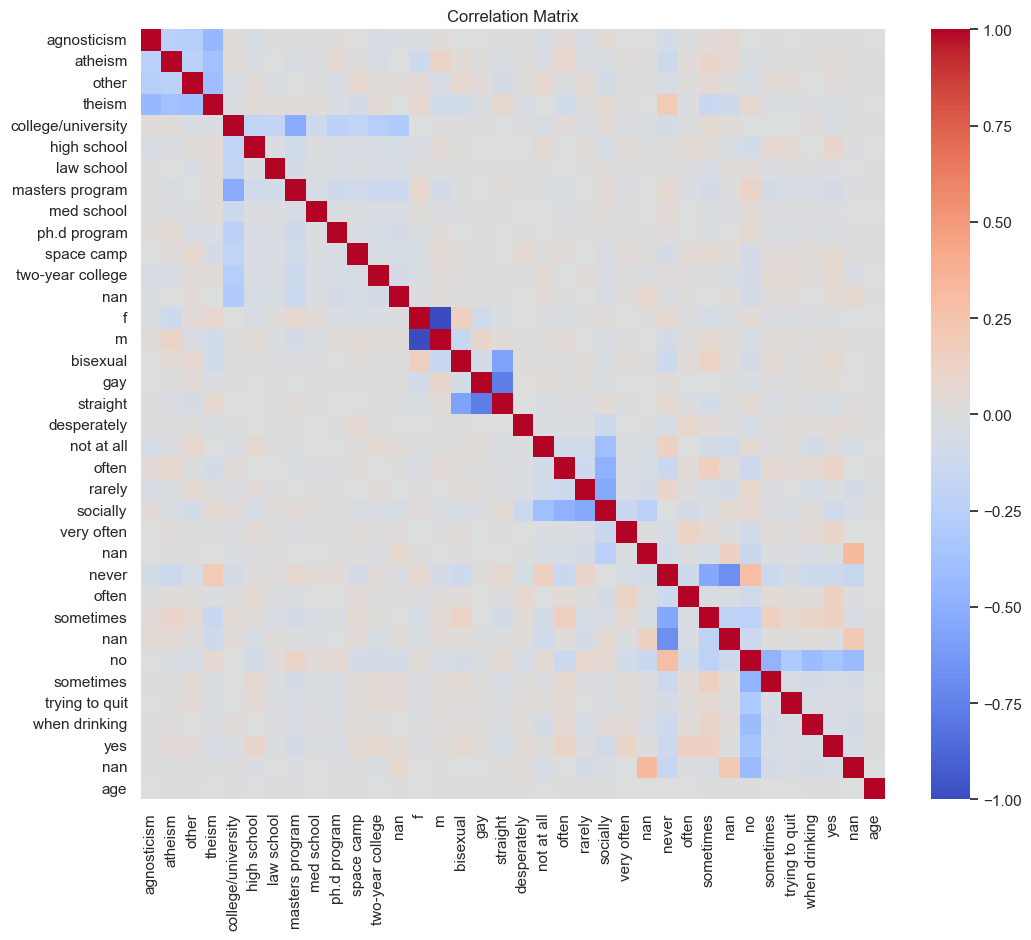

In [401]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In some cases, we also need to check the correlations among multiple columns:
- as a way to measure colinearty
- visualize the correlation matrix as a heatmap

In [402]:
okc_df['drugs'].value_counts()

never        24227
sometimes     5681
often          284
Name: drugs, dtype: int64

In [403]:
# correlated to education, drug usage, sex
# age cannot provide much information

In [404]:
# store
okc_df.to_csv('cleaned_ohced_data.csv', index=False)
